<a href="https://colab.research.google.com/github/AkshayAJoseph/CNN_Projects/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **Preprocessing the Data**

## Dataset Chosen - Diabetes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/drive/My Drive/Training.csv')

data.head()
data = data.dropna()

X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 2. **Developing a Transformer Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return layers.LayerNormalization(epsilon=1e-6)(x + res)

def build_transformer_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = transformer_encoder(inputs, head_size=256, num_heads=4, ff_dim=128, dropout=0.1)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    return tf.keras.Model(inputs, outputs)

model = build_transformer_model((X_train.shape[1], 1))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)



Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6005 - loss: 0.6917 - val_accuracy: 0.6199 - val_loss: 0.6872
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5899 - loss: 0.6878 - val_accuracy: 0.6199 - val_loss: 0.6827
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6229 - loss: 0.6814 - val_accuracy: 0.6199 - val_loss: 0.6788
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6186 - loss: 0.6783 - val_accuracy: 0.6199 - val_loss: 0.6758
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6007 - loss: 0.6789 - val_accuracy: 0.6199 - val_loss: 0.6737
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6184 - loss: 0.6735 - val_accuracy: 0.6199 - val_loss: 0.6717
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6184 - loss: 0.6718 - val_accuracy: 0.6199 - val_loss: 0.6702
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6074 - loss: 0.6733 - val_accuracy: 0.6199 - v

# 3. **Model Evaluation**

> ### *Accuracy*

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7911 - loss: 0.3896 
Test Accuracy: 0.7967479825019836


> ### *Confusion Matrix*

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


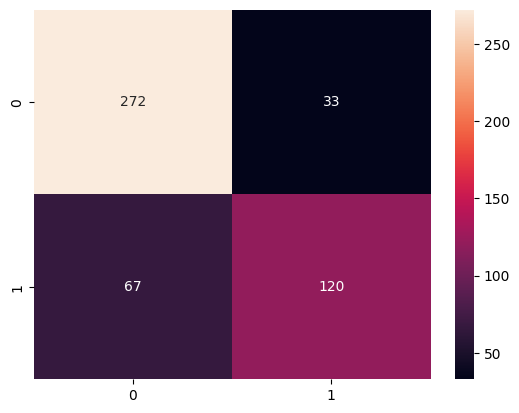

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


> ### *ROC Curve*

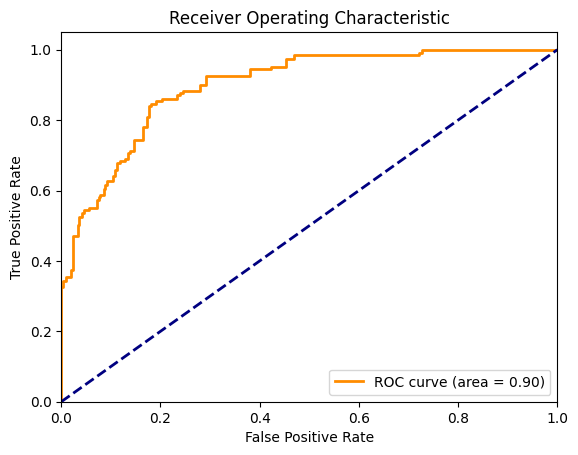

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# 4. ***Testing and Training Accuracy***

In [ ]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Training Accuracy: {train_acc}")
print(f"Testing Accuracy: {test_acc}")


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8912 - loss: 0.2752
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8765 - loss: 0.2825 
Training Accuracy: 0.8882113695144653
Testing Accuracy: 0.8739837408065796
